Morrison Osiezagha

Applied Artificial Intelligence (AI)

Codes for Waste Classification Using Machine Learning, Deep Learning, and Ensemble Learning Algorithms

#### Introduction

This classification of waste images involves building three models; MLP, MobileNetV2, and CNN. 
Then evaluating all three models by ensembling them in an ensemble. And finally comparing 
all models to see the best performance for deployment in real-life waste classification into organic or recyclable wastes.

### Multi Layer Perceptron (MLP) Model Building for Waste Classification

In [1]:
#importing the necessary libraries for use

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models
import pathlib
import warnings

In [2]:
#Loading the dataset and assigning path
data_path = "C:/Users/Helen/Downloads/Waste Classification Data"

In [3]:
#setting parameters for pre-processing data
batch_size = 32
img_height = 180
img_width = 180

In [4]:
#Assigning the preprocessed data to a training dataset variable with parameters
#identifying the classes in the dataset
#splitting dataset into training set
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_path,validation_split=0.2,subset="training",seed=123,
image_size=(img_height, img_width),batch_size=batch_size)

Found 25077 files belonging to 2 classes.
Using 20062 files for training.


In [5]:
#Assigning the preprocessed data to a validating dataset variable with parameters
#identifying the classes in the dataset
#splitting dataset into validation set
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_path,validation_split=0.2,subset="validation",seed=123,
image_size=(img_height, img_width),batch_size=batch_size)

Found 25077 files belonging to 2 classes.
Using 5015 files for validation.


In [6]:
#Assigning & printing the class names in the training dataset
class_names = train_ds.class_names
print(class_names)

['Organic', 'Recyclable']


In [7]:
#Autotuning & normalization to allow for optimum performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#rescalaing data
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))
num_classes = 2

0.0 1.0


In [8]:
#Building the MLP model with keras

mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(180, 180, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

#compiling the MLP model
mlp_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

#printing the summary
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 97200)             0         
                                                                 
 dense (Dense)               (None, 128)               12441728  
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 12443018 (47.47 MB)
Trainable params: 12443018 (47.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
#train MLP model
mlp_model = mlp_model.fit(train_ds, epochs=5, validation_data=val_ds)

Epoch 1/5
627/627 [==============================] - 137s 214ms/step - loss: 1052.3746 - accuracy: 0.7104 - val_loss: 4604.0015 - val_accuracy: 0.5051
Epoch 2/5
627/627 [==============================] - 147s 235ms/step - loss: 611.7566 - accuracy: 0.7255 - val_loss: 484.6757 - val_accuracy: 0.7803
Epoch 3/5
627/627 [==============================] - 142s 226ms/step - loss: 303.1448 - accuracy: 0.7290 - val_loss: 160.0102 - val_accuracy: 0.7482
Epoch 4/5
627/627 [==============================] - 146s 233ms/step - loss: 132.6479 - accuracy: 0.7367 - val_loss: 56.5397 - val_accuracy: 0.7573
Epoch 5/5
627/627 [==============================] - 151s 241ms/step - loss: 63.8371 - accuracy: 0.7423 - val_loss: 28.5340 - val_accuracy: 0.7707


In [10]:
#evaluate the MLP model on the training set
test_loss, test_acc = mlp_model.model.evaluate(train_ds, verbose=2)
print('\nTest accuracy:', test_acc)

627/627 - 52s - loss: 20.5985 - accuracy: 0.8131 - 52s/epoch - 83ms/step

Test accuracy: 0.8131293058395386


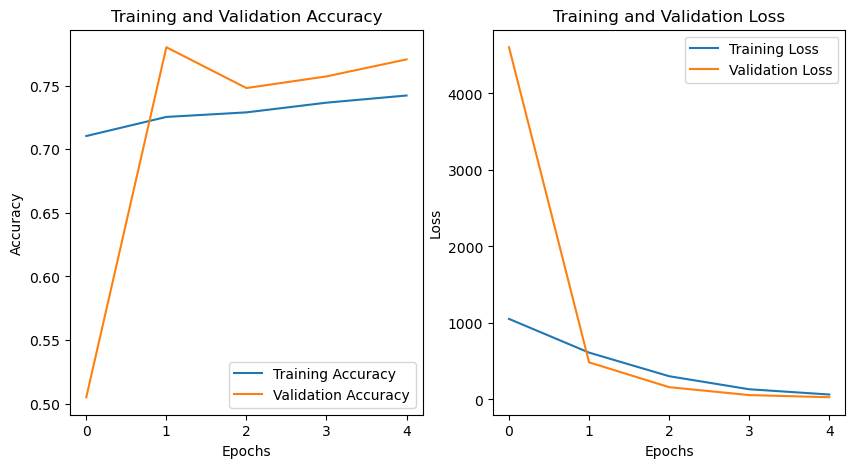

In [11]:
#Visualize loss & accuracy of the MLP model
epochs = 5
acc = mlp_model.history['accuracy']
val_acc = mlp_model.history['val_accuracy']
loss = mlp_model.history['loss']
val_loss = mlp_model.history['val_loss']
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [12]:
# Evaluate the MLP model on the validation set
val_loss, val_accuracy = mlp_model.model.evaluate(val_ds)
print(f"Validation accuracy: {val_accuracy:.4f}")

157/157 [==============================] - 14s 91ms/step - loss: 28.5340 - accuracy: 0.7707
Validation accuracy: 0.7707


In [13]:
# Predict classes for the validation set
val_pred_probs_mlp = mlp_model.model.predict(val_ds)
val_pred_classes_mlp = np.argmax(val_pred_probs_mlp, axis=1)

157/157 [==============================] - 4s 19ms/step


Classification Report:
               precision    recall  f1-score   support

     organic       0.81      0.75      0.78      2727
  recyclable       0.73      0.79      0.76      2288

    accuracy                           0.77      5015
   macro avg       0.77      0.77      0.77      5015
weighted avg       0.77      0.77      0.77      5015



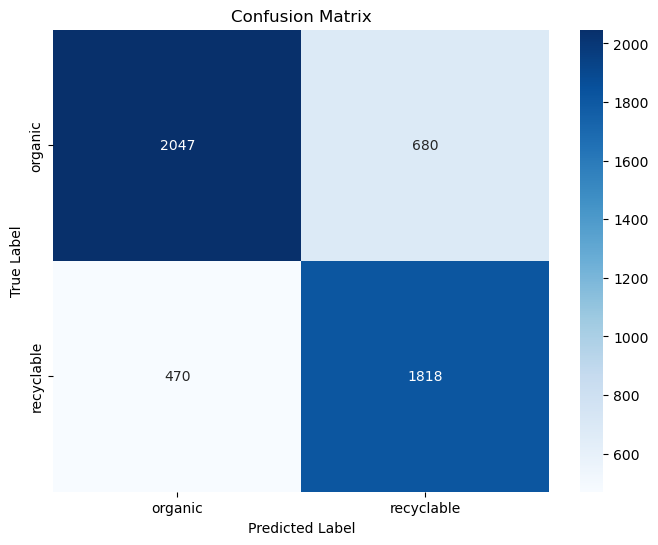

In [14]:
#Evaluate the MLP model's performance

#Import the evaluation report & metrics
from sklearn.metrics import classification_report, confusion_matrix

# Extract true class labels from the directory structure
val_true_classes = []
for _, labels in val_ds:
    val_true_classes.extend(labels.numpy())  # Extract true labels

# Define class names
class_names = ['organic', 'recyclable']

# Print classification report
report = classification_report(val_true_classes, val_pred_classes_mlp, target_names=class_names)
print("Classification Report:\n", report)

# Calculate confusion matrix
confusion_mat = confusion_matrix(val_true_classes, val_pred_classes_mlp)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

(32, 180, 180, 3)
(32,)


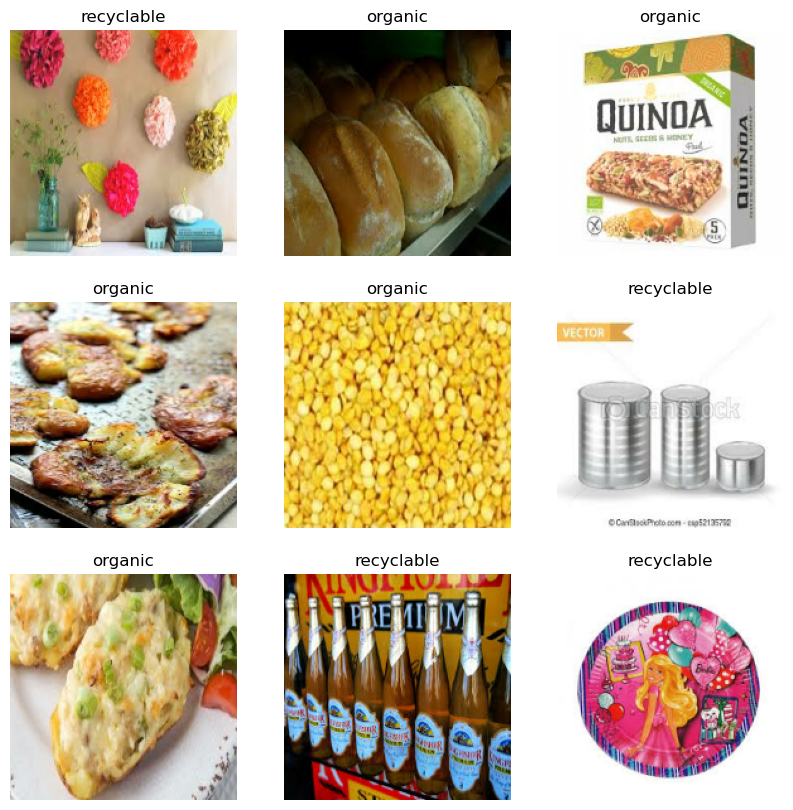

In [15]:
#printing sample waste images (labels) from the train_ds

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

In [16]:
#printing sample waste images (labels) from the train_ds

plt.figure(figsize=(10, 10))

for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


(32, 180, 180, 3)
(32,)


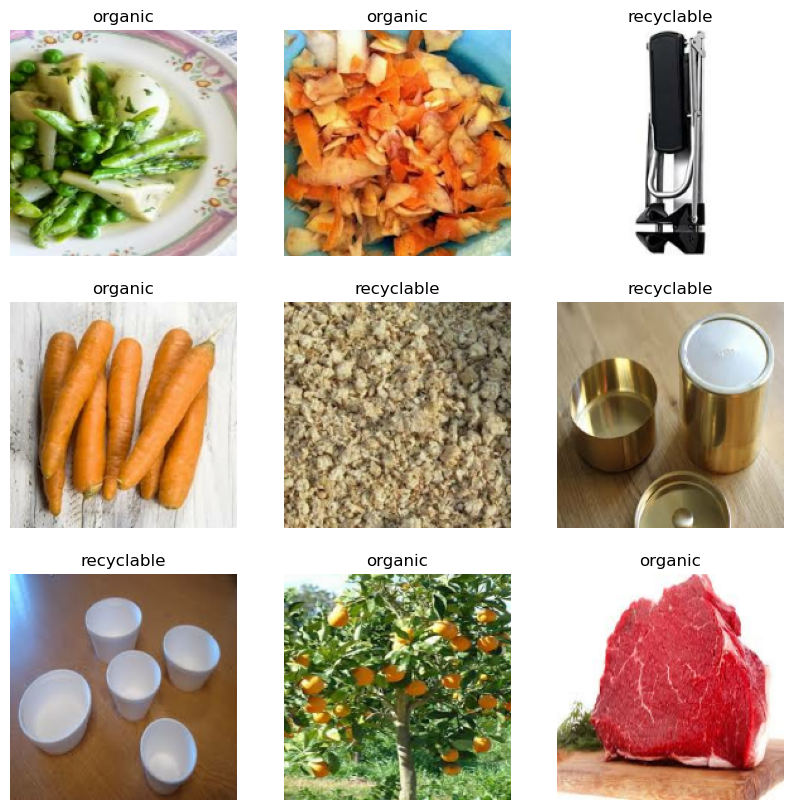

In [77]:
#printing sample waste images (labels) from the val_ds

plt.figure(figsize=(10, 10))

for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

for image_batch, labels_batch in val_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

### Evaluating all models (MLP, MobileNetV2 & CNN) as an Ensemble

In [78]:
#

In [79]:
# Evaluating all model's performance by an ensemble on the Training set
cnn_predictions_train = cnn_model.model.evaluate(train_ds)
mlp_predictions_train = mlp_model.model.evaluate(train_ds)
mnetv2_predictions_train = mnetv2_model.model.evaluate(train_ds)

627/627 [==============================] - 346s 552ms/step - loss: 0.1914 - accuracy: 0.9366


In [80]:
# Evaluating all model's performance by an ensemble on the validation set
cnn_predictions_val = cnn_model.model.evaluate(val_ds)
mlp_predictions_val = mlp_model.model.evaluate(val_ds)
mnetv2_predictions_val = mnetv2_model.model.evaluate(val_ds)

157/157 [==============================] - 81s 517ms/step - loss: 0.2109 - accuracy: 0.9268


In [128]:
# Ensemble predictions from the training set
ensemble_predictions_train = np.mean([cnn_predictions_train, mlp_predictions_train, mnetv2_predictions_train], axis=0)
ensemble_predictions_train

array([7.04647865, 0.86520121])

In [129]:
# Ensemble predictions from the validation set
ensemble_predictions_val = np.mean([cnn_predictions_val, mlp_predictions_val, mnetv2_predictions_val], axis=0)
ensemble_predictions_val

array([9.7138403 , 0.84167498])

### Accuracy comparison plot of all models

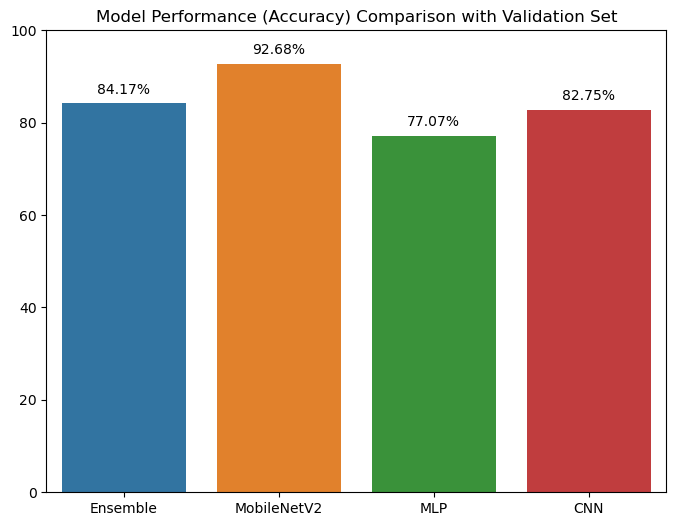

In [134]:
#Validation set comparison bar plot

# Accuracy values
Ensemble_acc = 0.84167498
MobileNetV2_acc = 0.9268
MLP_acc = 0.7707
CNN_acc = 0.8275

# Convert accuracies to percentages
Ensemble_acc_percent = Ensemble_acc * 100
MobileNetV2_acc_percent = MobileNetV2_acc * 100
MLP_acc_percent = MLP_acc * 100
CNN_acc_percent = CNN_acc * 100

# Create a DataFrame for Seaborn
data = {
    'Model': ['Ensemble', 'MobileNetV2', 'MLP', 'CNN'],
    'Accuracy (%)': [Ensemble_acc_percent, MobileNetV2_acc_percent, MLP_acc_percent, CNN_acc_percent]
}

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Model', y='Accuracy (%)', data=data)
plt.ylim(0, 100)  # Set y-axis limits (accuracy percentage range)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Model Performance (Accuracy) Comparison with Validation Set')
plt.show()


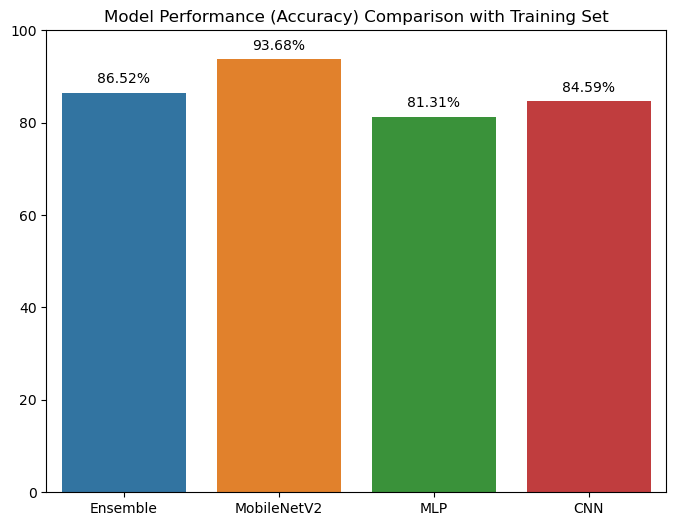

In [138]:
#Training set comparison plot

# Accuracy values
Ensemble_acc_tr = 0.86520121
MobileNetV2_acc_tr = 0.9368
MLP_acc_tr = 0.8131
CNN_acc_tr = 0.8459

# Convert accuracies to percentages
Ensemble_acc_tr_percent = Ensemble_acc_tr * 100
MobileNetV2_acc_tr_percent = MobileNetV2_acc_tr * 100
MLP_acc_tr_percent = MLP_acc_tr * 100
CNN_acc_tr_percent = CNN_acc_tr * 100

# Create a DataFrame for Seaborn
data = {
    'Model': ['Ensemble', 'MobileNetV2', 'MLP', 'CNN'],
    'Accuracy (%)': [Ensemble_acc_tr_percent, MobileNetV2_acc_tr_percent, MLP_acc_tr_percent, CNN_acc_tr_percent]
}

# Create a bar plot using Seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Model', y='Accuracy (%)', data=data)
plt.ylim(0, 100)  # Set y-axis limits (accuracy percentage range)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Model Performance (Accuracy) Comparison with Training Set')
plt.show()


In [126]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(
    estimators=[
        ('MobileNetV2', mnetv2_model),
        ('MLP', mlp_model),
        ('CNN', cnn_model)
    ],
    voting='soft',  # Use 'soft' for probability-based voting
    weights=[MobileNetV2_acc, MLP_acc, CNN_acc]  # Use accuracy values as weights
)

ensemble

VotingClassifier(estimators=[('MobileNetV2',
                              <keras.src.callbacks.History object at 0x000002BAF434BD10>),
                             ('MLP',
                              <keras.src.callbacks.History object at 0x000002B8C6B381D0>),
                             ('CNN',
                              <keras.src.callbacks.History object at 0x000002B88755B250>)],
                 voting='soft', weights=[0.9268, 0.7707, 0.8459])

In [136]:
import tensorflow as tf

# Define directories for train and test images
train_dir = 'path_to_train_data_directory'
test_dir = 'path_to_test_data_directory'

# Define image size and batch size
image_size = (224, 224)  # Adjust based on your model's input size
batch_size = 32  # Adjust as needed

# Create data generators for train and test sets
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=20,  # Data augmentation options
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'  # Assumes multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Define training and testing data
X_train = train_generator
y_train = train_generator.classes

X_test = test_generator
y_test = test_generator.classes


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'path_to_train_data_directory'

In [124]:


ensemble.fit(train_ds, val_ds)
# y_pred = ensemble.predict(X_test)


ValueError: Expected array-like (array or non-string sequence), got <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>